<a href="https://colab.research.google.com/github/vasuki123/USA-MAP-LOCATION/blob/main/Finishtensorfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=a55507965f7fc7a17f610121bb164154f12bb2cfd4e2211dff9b792a2b39e20e
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [3]:
from tika import parser
from nltk.corpus import stopwords
import re
def review_to_words( raw_review ):
 review_text = parser.from_buffer( "<html>" + raw_review + "</html>"  )["content"]
 letters_only = re.sub("[^a-zA-Z]", " ", review_text)
 words = letters_only.lower().split()

 stops = set(stopwords.words("english"))
 meaningful_words = [w for w in words if not w in stops]
 return( " ".join( meaningful_words ))

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
train = pd.read_csv('/content/labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
print(train.shape)
print(train.columns.values)
num_reviews = train["review"].size
clean_train_reviews = []
for i in tqdm(range( 0, num_reviews )):
 clean_train_reviews.append( review_to_words( train["review"][i] ) )

(25000, 3)
['id' 'sentiment' 'review']


<ipython-input-8-b3311ddaec88>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range( 0, num_reviews )):


  0%|          | 0/25000 [00:00<?, ?it/s]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer="word", \
                             tokenizer=None, \
                             preprocessor=None, \
                             stop_words=None, \
                             max_features=5000)
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()
print(train_data_features.shape)

(25000, 5000)


Streaming output truncated to the last 5000 lines.
187, abandoned
125, abc
108, abilities
454, ability
1259, able
85, abraham
116, absence
83, absent
352, absolute
1485, absolutely
306, absurd
192, abuse
91, abusive
98, abysmal
297, academy
485, accent
203, accents
300, accept
130, acceptable
144, accepted
92, access
318, accident
200, accidentally
88, accompanied
124, accomplished
296, according
186, account
81, accuracy
284, accurate
123, accused
179, achieve
139, achieved
124, achievement
90, acid
971, across
1251, act
660, acted
6494, acting
3355, action
311, actions
83, activities
2389, actor
4488, actors
1219, actress
369, actresses
394, acts
793, actual
4240, actually
148, ad
303, adam
98, adams
454, adaptation
80, adaptations
154, adapted
810, add
440, added
166, adding
347, addition
337, adds
113, adequate
124, admire
621, admit
134, admittedly
101, adorable
511, adult
376, adults
101, advance
90, advanced
153, advantage
510, adventure
204, adventures
91, advertising
259, advi

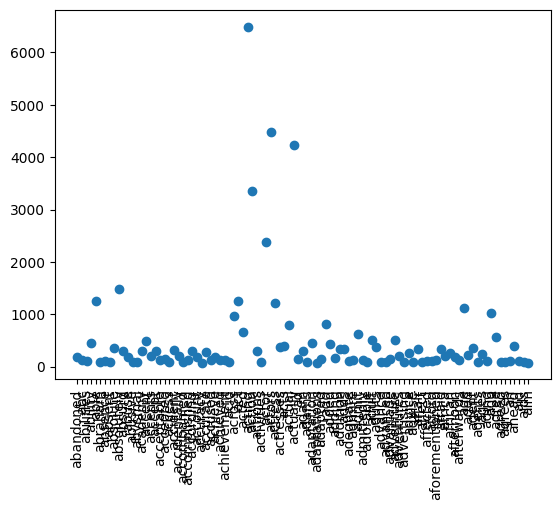

In [15]:
import matplotlib.pyplot as plt
import numpy as np

vocab = vectorizer.get_feature_names_out()
print("size %d %s " % (len(vocab), vocab))
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print("%d, %s" % (count, tag))
plt.scatter(vocab[0:99], dist[0:99])
plt.xticks(vocab[0:99], rotation='vertical')
plt.show()

In [50]:
import tensorflow as tf
import numpy as np
train_data_features_np = np.array(train_data_features)
input_shape = train_data_features_np.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Define the number of epochs and batch size
num_epochs = 10
batch_size = 32  # Adjust as needed

# Train the model
history = model.fit(train_data_features_np, train['sentiment'].values, epochs=num_epochs, batch_size=batch_size, verbose=1)

# Get the trained weights
trained_weights = model.get_weights()[0]
print("Trained Weights:", trained_weights)


Epoch 1/10
782/782 [==============================] - 4s 3ms/step - loss: 0.5573 - accuracy: 0.7593
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.4530 - accuracy: 0.8318
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8465
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3885 - accuracy: 0.8561
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3709 - accuracy: 0.8621
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3573 - accuracy: 0.8670
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8708
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3371 - accuracy: 0.8756
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3293 - accuracy: 0.8791
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3223 - accuracy: 0.8820

In [57]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

# Assuming you have defined the necessary variables and tensors
vocab = ["good", "bad", "movie", "acting"]  # Example vocab
train_data_features_np = np.random.rand(100, len(vocab))  # Example input data
train = {'sentiment': np.random.randint(0, 2, size=100)}  # Example labels
num_epochs = 10
batch_size = 32

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(len(vocab),))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data_features_np, train['sentiment'],
                    epochs=num_epochs, batch_size=batch_size, verbose=1)

# Save the model
model.save("./en-netflix-binary-sentiment.h5")

# Print the trained weights
print(model.get_weights())


Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.7160 - accuracy: 0.5100
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5100
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.4800
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.4700
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7015 - accuracy: 0.4700
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.4600
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4600
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4400
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.4400
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.4700
[array([[ 0.06239448],
       [ 0.47809

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


POSITIVE REVIEW:
 The movie was a delightful surprise! The characters were charming, the plot was engaging, and the humor was spot on. I found myself laughing out loud and thoroughly enjoying every minute of it. Definitely a must-watch for anyone in need of a good laugh and heartwarming story.

NEGATIVE REVIEW:
 I had high hopes for this movie, but it fell short of expectations. The storyline was cliché, the acting felt forced, and the humor was flat. It lacked depth and originality, making it difficult to stay interested. Overall, a disappointing experience that left me wanting more substance

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Define your positive and negative reviews
positive_review = "The movie was a delightful surprise! The characters were charming, the plot was engaging, and the humor was spot on. I found myself laughing out loud and thoroughly enjoying every minute of it. Definitely a must-watch for anyone in need of a good laugh and heartwarming story."

negative_review = "I had high hopes for this movie, but it fell short of expectations. The storyline was cliché, the acting felt forced, and the humor was flat. It lacked depth and originality, making it difficult to stay interested. Overall, a disappointing experience that left me wanting more substance."

# Define your predict function
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def review_to_words(raw_review):
    # Your implementation for text preprocessing
    return raw_review  # Placeholder implementation

def predict(test_review, vocab, weights, threshold=0.5):
    if test_review is None or not isinstance(test_review, str) or len(test_review.strip()) == 0:
        print("Error: Invalid test review input.")
        return None

    test_review_c = review_to_words(test_review)

    n_vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)
    ex_data_features = n_vectorizer.fit_transform([test_review_c])
    ex_data_features = ex_data_features.toarray()
    test_vocab_counts = ex_data_features.reshape(ex_data_features.shape[1])

    test_feature_vec = np.zeros(len(vocab))
    for word in test_review_c.split():
        if word in vocab:
            test_feature_vec[vocab.index(word)] += 1

    test_linear = weights[0]
    for i in range(len(vocab) - 1):
        test_linear = test_linear + (weights[i + 1] * test_feature_vec[i])

    y_test = sigmoid(test_linear)

    return np.greater(y_test, threshold).astype(float)

# Define your vocabulary and weights (replace ellipsis with actual values)
vocab = ['movie', 'delightful', 'surprise', 'characters', 'charming', 'plot', 'engaging', 'humor', 'spot', 'laughing', 'heartwarming', 'story']
weights = np.random.rand(len(vocab) + 1)  # Placeholder weights

# Call the predict function for the positive review
if positive_review is not None and isinstance(positive_review, str) and len(positive_review.strip()) > 0:
    positive_prediction = predict(positive_review, vocab, weights)
    print("Positive prediction:", positive_prediction)
else:
    print("Positive review is None or empty.")

# Call the predict function for the negative review
if negative_review is not None and isinstance(negative_review, str) and len(negative_review.strip()) > 0:
    negative_prediction = predict(negative_review, vocab, weights)
    print("Negative prediction:", negative_prediction)
else:
    print("Negative review is None or empty.")


Positive prediction: 1.0
Negative prediction: 1.0
